In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from skimage import io
from sklearn.preprocessing import normalize

# Part 1

In [22]:
template_path = "./dataset/template.jpg"
group_img_path = "./dataset/group_img.jpg"

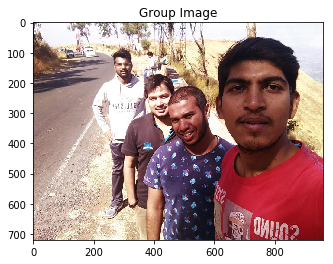

In [23]:
im = Image.open(group_img_path)
imgplot = plt.imshow(im)
plt.title("Group Image")
plt.show()

# Normalize matrix

In [24]:
def Normalize(mat):
    #row_sums = mat.sum()
    new_matrix = (mat -mat.mean())/ np.std(mat)
    return new_matrix

In [25]:
# a = np.arange(6).reshape((3, 2))
# Normalize(a)

# Load Image in grayscale

In [26]:
def toGrayscale(img_path):
    img = io.imread(img_path, as_gray=True)
    img = np.asarray(img)
    plt.imshow(img,cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    return img

In [27]:
def Correlation(img,kernel):
    img = np.asarray(img)
    h,w = img.shape[0],img.shape[1]
    
    #################################################################################
    stride = 1
    new_i = 0
    fil_h = kernel.shape[0]
    fil_w = kernel.shape[1]
    new_img = np.zeros((h-fil_h+1,w-fil_w+1))
    #################################################################################
    
    for i in range(h - fil_h+1):
        for j in range(w - fil_w+1):
            im_region = img[i:(i + fil_h), j:(j + fil_w)]
            im_region = Normalize(im_region)
            r = np.multiply(im_region,kernel).sum()
            if r == 0:
                continue
            new_img[i][j] = float(r)#/fil_h*fil_w)
    return new_img

In [28]:
# def NCC(img,template):
#     #print(img.shape)
#     l,b = img.shape[0],img.shape[1]
#     new_img = np.zeros((l,b))
#     #print(new_img.shape)
    
#     #################################################################################
#     stride = 1
#     new_i = 0
#     fil_l = template.shape[0]
#     fil_b = template.shape[1]
#     #################################################################################
    
#     for i in range(fil_l,l-(fil_l-1),stride):
#         new_j = 0
#         for j in range(fil_b,b-(fil_b-1),stride):
#             r = np.multiply(img[new_i:i,new_j:j],template).sum()
#             new_j += stride 
#             new_img[i][j] = float(r/(fil_l*fil_b))
#             r = 0
#         new_i += stride
#     #print(new_img.shape)
#     return new_img

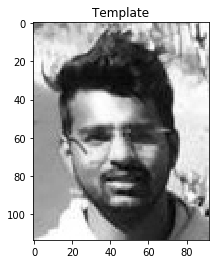

In [34]:
template = toGrayscale(template_path)
template = Normalize(template)
plt.imshow(template,cmap=plt.get_cmap('gray'))
plt.title("Template")
plt.show()

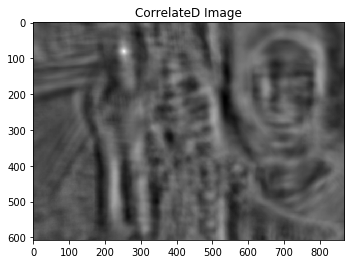

In [35]:
group_img = toGrayscale(group_img_path)
resulting_img = Correlation(group_img,template)
plt.imshow(resulting_img,cmap=plt.get_cmap('gray'))
plt.title("CorrelateD Image")
plt.show()

## Why Peak Occur
Peak occur in the resulting image because of maximum similarity with the image and template found. So wherever the maximum similarity comes values will peak like closer to 1

# Part 2

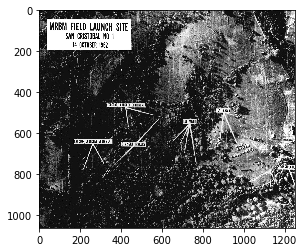

In [12]:
img_path = "./dataset/u2cuba.jpg"
template_path = "./dataset/trailer.png"
template = toGrayscale(template_path)
template = Normalize(template)
img = toGrayscale(img_path)

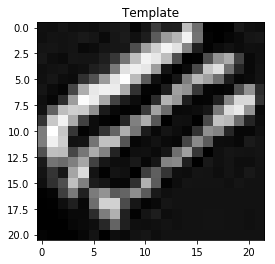

In [13]:
plt.imshow(template,cmap=plt.get_cmap('gray'))
plt.title("Template")
plt.show()

## With smaller filter

/work/test/venv/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


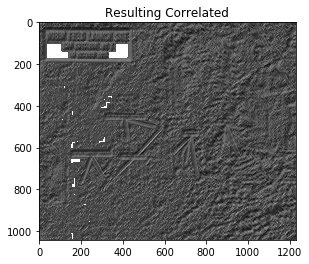

In [14]:
resulting_img = Correlation(img,template)
plt.imshow(resulting_img,cmap=plt.get_cmap('gray'))
plt.title("Resulting Correlated")
plt.show()

## Reason for straight line artifacts
Correlation is measure of similarity between two object. The template we have has both black and white pixel in some shape present in image. When we do correlation we get the values closer to 1.0 on the region which are similar to template, so the straight line artifacts are an evidence that we get more similar region like template on the image we are correlating.  

# Part3

## With Bigger Filter

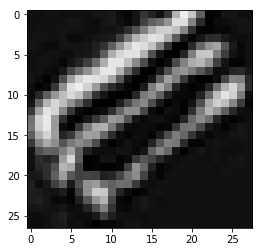

In [36]:
template_path = "./dataset/trailerSlightlyBigger.png"
template = toGrayscale(template_path)
template = Normalize(template)

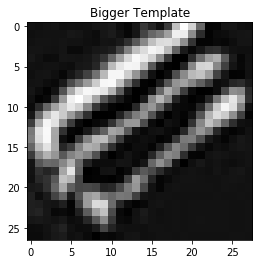

In [37]:
plt.imshow(template,cmap=plt.get_cmap('gray'))
plt.title("Bigger Template")
plt.show()

/work/test/venv/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


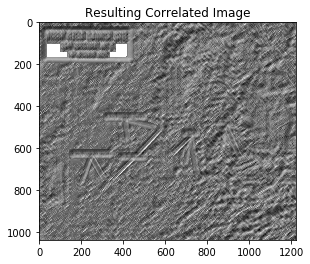

In [15]:
img = toGrayscale(img_path)
resulting_img = Correlation(img,template)
plt.imshow(resulting_img,cmap=plt.get_cmap('gray'))
plt.title("Resulting Correlated Image")
plt.show()

## Why they are different from part (b)
It is because of the size of the template higher than the part b template it has more black or closer pixel than in part b template. In this we are getting less white spot in resulting image and also there is no white line artifacts because the template is not that much similar to corresponding regions. 

## Limitations of cross-correlation for identifying objects in real-world photos
It is not able to give correct peak over the image due to the normalization over the images if you have different region than template but having pixel values in multiple of template then normalization is same and also "Scaling" is a major issue here.




# Part 4

## Total mathematical operations will the entire search require? Here, were looking for a Big-O Notation estimate.
N^2m^2NrNs
To get one pixel from conv operation we have to do total (m*m) multiplication operation and (m*m-1) addition, so we can take O(m^2) operation for that. To perform conv over entire image we have to run it like (N-m)^2 time i.e. O(N^2)times. So mathematical operation over image is O(N^2m^2) times. For Nr rotation total operation are O(NrN^2m^2). For Ns Scale of filter O(NsNrN^2m^2).

In [31]:
# x = np.array(([2,3,1,0],[2,4,1,0],[1,2,1,0],[2,3,5,0]))
# y = np.array(([1,4,2],[1,3,1],[1,5,1],[4,1,5]))
# res_dot = np.dot(x,y)
# #res_mul= np.multiply(x,y)
# res_matmul = np.matmul(x,y)
# print(np.dot([1,2,3,4],[4,3,2,1]))
# print(res_matmul)
# print(res_dot)